In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerias

In [43]:
# Step 1: Importar las librerías necesarias
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np
import pandas as pd

# Libreria para graficos
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# Cargado de Texto

In [44]:
"""
import numpy as np

# Cargar el dataset CSV usando numpy
# Reemplaza la ruta '/path/to/dataset.csv' con la ruta correcta del archivo
data = np.genfromtxt('/content/test.csv', delimiter=',', dtype=None, encoding=None, names=True)

# Nota: 'skip_header=1' es para omitir el encabezado (los nombres de las columnas).
# 'dtype=None' permite manejar datos de diferentes tipos en una misma fila.

print("Forma del dataset:", data.shape)  # Esto nos da una idea de cómo están estructurados los datos
# Verificamos los primeros 5 datos cargados
print(data[:5])
"""
# La entrada es de 14 elemento contando con x0
input_layer_size  = 171

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 84

#  datos de entrenamiento almacenados en los arreglos X, y
# data = loadmat(os.path.join('Datasets', 'ex3data1.mat'))
data = pd.read_csv('/content/test.csv', delimiter=',', decimal='.')
data = pd.DataFrame(data)

data.head()
# Crear un diccionario para mapear los strings a enteros
mapeo = {
    'flammea': 1, 'palustris': 2, 'schoenobaenus': 3, 'scirpaceus': 4,
    'caudatus': 5, 'arvensis': 6, 'pratensis': 7, 'trivialis': 8,
    'apus': 9, 'canadensis': 10, 'alpina': 11, 'europaeus': 12,
    'carduelis': 13, 'familiaris': 14, 'chloris': 15, 'ridibundus': 16,
    'monedula': 17, 'livia': 18, 'oenas': 19, 'palumbus': 20,
    'corax': 21, 'corone': 22, 'frugilegus': 23, 'canorus': 24,
    'caeruleus': 25, 'urbicum': 26, 'major': 27, 'martius': 28,
    'calandra': 29, 'citrinella': 30, 'schoeniclus': 31, 'rubecula': 32,
    'coelebs': 33, 'atra': 34, 'gallinago': 35, 'chloropus': 36,
    'glandarius': 37, 'stellata': 38, 'ostralegus': 39, 'rustica': 40,
    'torquilla': 41, 'lagopus': 42, 'argentatus': 43, 'cannabina': 44,
    'fluviatilis': 45, 'curvirostra': 46, 'megarhynchos': 47, 'apiaster': 48,
    'aguimp': 49, 'striata': 50, 'oriolus': 51, 'domesticus': 52,
    'montanus': 53, 'perdix': 54, 'ater': 55, 'apivorus': 56,
    'colchicus': 57, 'phoenicurus': 58, 'collybita': 59, 'sibilatrix': 60,
    'trochilus': 61, 'pica': 62, 'viridis': 63, 'apricaria': 64,
    'squatarola': 65, 'modularis': 66, 'pyrrhula': 67, 'regulus': 68,
    'europaea': 69, 'decaocto': 70, 'turtur': 71, 'aluco': 72,
    'vulgaris': 73, 'atricapilla': 74, 'borin': 75, 'communis': 76,
    'curruca': 77, 'glareola': 78, 'totanus': 79, 'troglodytes': 80,
    'iliacus': 81, 'merula': 82, 'philomelos': 83, 'vanellus': 84
}


# Usar el método .map() para convertir los valores
data['species'] = data['species'].map(mapeo)

# Cambiamos los valores NA a 0
data['species'] = data['species'].fillna(0).astype(int)


X = data.select_dtypes(include=[np.number]).iloc[:, :171].values
y = data.iloc[:, 171].values


m = y.size

# Obtener el número de filas
num_filas = data.shape[0]

print(f"Número de filas: {num_filas}")

Número de filas: 16626


In [45]:
"""
# Diccionario de mapeo de etiquetas (species)
mapeo = {
    'flammea': 1, 'palustris': 2, 'schoenobaenus': 3, 'scirpaceus': 4,
    'caudatus': 5, 'arvensis': 6, 'pratensis': 7, 'trivialis': 8,
    'apus': 9, 'canadensis': 10, 'alpina': 11, 'europaeus': 12,
    'carduelis': 13, 'familiaris': 14, 'chloris': 15, 'ridibundus': 16,
    'monedula': 17, 'livia': 18, 'oenas': 19, 'palumbus': 20,
    'corax': 21, 'corone': 22, 'frugilegus': 23, 'canorus': 24,
    'caeruleus': 25, 'urbicum': 26, 'major': 27, 'martius': 28,
    'calandra': 29, 'citrinella': 30, 'schoeniclus': 31, 'rubecula': 32,
    'coelebs': 33, 'atra': 34, 'gallinago': 35, 'chloropus': 36,
    'glandarius': 37, 'stellata': 38, 'ostralegus': 39, 'rustica': 40,
    'torquilla': 41, 'lagopus': 42, 'argentatus': 43, 'cannabina': 44,
    'fluviatilis': 45, 'curvirostra': 46, 'megarhynchos': 47, 'apiaster': 48,
    'aguimp': 49, 'striata': 50, 'oriolus': 51, 'domesticus': 52,
    'montanus': 53, 'perdix': 54, 'ater': 55, 'apivorus': 56,
    'colchicus': 57, 'phoenicurus': 58, 'collybita': 59, 'sibilatrix': 60,
    'trochilus': 61, 'pica': 62, 'viridis': 63, 'apricaria': 64,
    'squatarola': 65, 'modularis': 66, 'pyrrhula': 67, 'regulus': 68,
    'europaea': 69, 'decaocto': 70, 'turtur': 71, 'aluco': 72,
    'vulgaris': 73, 'atricapilla': 74, 'borin': 75, 'communis': 76,
    'curruca': 77, 'glareola': 78, 'totanus': 79, 'troglodytes': 80,
    'iliacus': 81, 'merula': 82, 'philomelos': 83, 'vanellus': 84
}

# Extraemos las columnas X (características) y y (etiqueta 'species')
# Asumimos que la columna 'species' es la última del dataset y las 171 anteriores son características
# Necesitamos convertir las especies en valores numéricos

# Separar características y etiquetas
# Creamos un arreglo 2D con las primeras 171 columnas como características
X = np.array([fila[:-1] for fila in data], dtype=float)  # Las primeras 171 columnas son características numéricas

# Obtenemos la última columna, que contiene los nombres de las especies
species_column = np.array([fila[-1] for fila in data], dtype=str)   # La última columna es la etiqueta (especie en texto)

# Mapeamos las especies a números usando el diccionario
# Reemplazar las especies faltantes con "desconocido" o algún valor predefinido
y = np.array([mapeo.get(species, 0) for species in species_column])  # Convertimos especies a números

# Verificamos las primeras entradas para asegurar que todo está en orden
print("Características (X):", X[:5])
print("Etiquetas (y):", y[:5])
"""

'\n# Diccionario de mapeo de etiquetas (species)\nmapeo = {\n    \'flammea\': 1, \'palustris\': 2, \'schoenobaenus\': 3, \'scirpaceus\': 4,\n    \'caudatus\': 5, \'arvensis\': 6, \'pratensis\': 7, \'trivialis\': 8,\n    \'apus\': 9, \'canadensis\': 10, \'alpina\': 11, \'europaeus\': 12,\n    \'carduelis\': 13, \'familiaris\': 14, \'chloris\': 15, \'ridibundus\': 16,\n    \'monedula\': 17, \'livia\': 18, \'oenas\': 19, \'palumbus\': 20,\n    \'corax\': 21, \'corone\': 22, \'frugilegus\': 23, \'canorus\': 24,\n    \'caeruleus\': 25, \'urbicum\': 26, \'major\': 27, \'martius\': 28,\n    \'calandra\': 29, \'citrinella\': 30, \'schoeniclus\': 31, \'rubecula\': 32,\n    \'coelebs\': 33, \'atra\': 34, \'gallinago\': 35, \'chloropus\': 36,\n    \'glandarius\': 37, \'stellata\': 38, \'ostralegus\': 39, \'rustica\': 40,\n    \'torquilla\': 41, \'lagopus\': 42, \'argentatus\': 43, \'cannabina\': 44,\n    \'fluviatilis\': 45, \'curvirostra\': 46, \'megarhynchos\': 47, \'apiaster\': 48,\n    \'agui

# Construir un Dataset Sintético

In [46]:
# Paso 1: Construir un Dataset Sintético
# Simulación de datos de entrada: 1760 filas, 171 características numéricas
X = np.random.rand(16626, 171)

# Atributos adicionales:
# 1. "habitat": puede ser 'forest', 'wetland', 'grassland' o 'urban' (texto)
habitat = np.random.choice(['forest', 'wetland', 'grassland', 'urban'], 16626)

# 2. "migratory": booleano que indica si la especie es migratoria (True/False)
migratory = np.random.choice([True, False], 16626)

# 3. "rare_species": booleano que indica si es una especie rara o no (True/False)
rare_species = np.random.choice([True, False], 16626)

# 4. "conservation_status": puede ser 'least concern', 'near threatened', 'vulnerable', 'endangered' (texto)
conservation_status = np.random.choice(
    ['least concern', 'near threatened', 'vulnerable', 'endangered'], 16626)

# Convertir atributos categóricos y booleanos a números
# Mapeo del hábitat a números
habitat_map = {'forest': 0, 'wetland': 1, 'grassland': 2, 'urban': 3}
habitat_numeric = np.vectorize(habitat_map.get)(habitat)

# Convertir booleanos a 1 y 0
migratory_numeric = migratory.astype(int)
rare_species_numeric = rare_species.astype(int)

# Mapeo del estado de conservación a números
status_map = {'least concern': 0, 'near threatened': 1, 'vulnerable': 2, 'endangered': 3}
conservation_status_numeric = np.vectorize(status_map.get)(conservation_status)

# Agregar los nuevos atributos a la matriz de características X
# Añadir las 4 nuevas columnas al final de X
X = np.hstack((X, habitat_numeric.reshape(-1, 1)))
X = np.hstack((X, migratory_numeric.reshape(-1, 1)))
X = np.hstack((X, rare_species_numeric.reshape(-1, 1)))
X = np.hstack((X, conservation_status_numeric.reshape(-1, 1)))

# Verificamos la nueva forma del dataset con las características adicionales
print("Nueva forma del dataset (incluyendo atributos categóricos):", X.shape)

# Imprimir las primeras 5 filas de los atributos categóricos y booleanos convertidos
print("Primeras 5 filas del atributo 'habitat' (numérico):", habitat_numeric[:5])
print("Primeras 5 filas del atributo 'migratory' (booleano convertido):", migratory_numeric[:5])
print("Primeras 5 filas del atributo 'rare_species' (booleano convertido):", rare_species_numeric[:5])
print("Primeras 5 filas del atributo 'conservation_status' (numérico):", conservation_status_numeric[:5])


Nueva forma del dataset (incluyendo atributos categóricos): (16626, 175)
Primeras 5 filas del atributo 'habitat' (numérico): [0 0 1 0 2]
Primeras 5 filas del atributo 'migratory' (booleano convertido): [1 1 0 0 0]
Primeras 5 filas del atributo 'rare_species' (booleano convertido): [1 1 0 1 0]
Primeras 5 filas del atributo 'conservation_status' (numérico): [3 2 2 0 1]


# Duplicar los ejemplos con criterios consistentes

In [47]:
# Paso 2: Duplicar los ejemplos con criterios consistentes

# Supongamos que 'X' es la matriz con las 171 características y las 4 columnas adicionales
# La forma original de X es (1760, 175) -> 1760 ejemplos y 175 columnas
# (171 características de audio + 4 atributos categóricos o booleanos)
X = np.random.rand(16626, 171)  # Simulamos 171 características numéricas

# También tenemos atributos categóricos y booleanos ya convertidos a números
habitat_numeric = np.random.randint(0, 4, 16626)  # Simulamos 4 tipos de hábitat (0 a 3)
migratory_numeric = np.random.randint(0, 2, 16626)  # Simulamos 2 valores booleanos (0 o 1)
rare_species_numeric = np.random.randint(0, 2, 16626)  # Simulamos 2 valores booleanos (0 o 1)
conservation_status_numeric = np.random.randint(0, 4, 16626)  # Simulamos 4 estados de conservación (0 a 3)

# Concatenamos las columnas categóricas a X para tener el dataset completo
X = np.hstack((
    X,
    habitat_numeric.reshape(-1, 1),
    migratory_numeric.reshape(-1, 1),
    rare_species_numeric.reshape(-1, 1),
    conservation_status_numeric.reshape(-1, 1)
))

# 1. Duplicar los ejemplos añadiendo pequeñas perturbaciones a las características de audio
# Generamos ruido aleatorio pequeño para mantener los datos dentro de rangos realistas
perturbation = np.random.normal(0, 0, X[:, :171].shape)  # Ruido pequeño para las 171 características de audio

# Creamos el dataset duplicado
X_duplicated = np.copy(X)  # Copia completa del dataset original

# Modificamos solo las 171 primeras columnas (características de audio) con la perturbación
X_duplicated[:, :171] = X_duplicated[:, :171] + perturbation

# 2. Aseguramos que las perturbaciones no salgan de los límites (0 a 1 en este caso, para datos de audio)
X_duplicated[:, :171] = np.clip(X_duplicated[:, :171], 0, 1)  # Limitar los valores entre 0 y 1

# 3. Concatenamos los ejemplos originales y los duplicados
# dataset_sintetico = np.vstack((X, X_duplicated))  # <- Asegúrate de que esta línea se ejecuta
X_final = np.vstack((X, X_duplicated))
# Verificamos la nueva forma del dataset duplicado
print("Nueva forma del dataset (duplicado):", X_final.shape)

# Verificamos algunas filas para comprobar la consistencia
print("Primeras 5 filas del dataset original:")
print(X[:5])
print("Primeras 5 filas del dataset duplicado:")
print(X_final[-5:])



Nueva forma del dataset (duplicado): (33252, 175)
Primeras 5 filas del dataset original:
[[7.44133263e-01 8.20839169e-01 4.03200872e-02 8.86554356e-01
  7.28384467e-01 2.85648451e-01 1.37175128e-01 7.86155690e-01
  4.12110593e-01 6.77389194e-01 5.25683950e-01 7.29896953e-01
  7.50416476e-01 2.56355807e-01 9.02662884e-01 9.40129768e-01
  2.11929788e-01 1.25329610e-01 4.41603542e-01 1.25422228e-01
  9.82904961e-01 1.04838317e-01 5.89505810e-01 6.30218955e-01
  2.69293236e-01 9.66913782e-01 9.11536269e-01 1.42718647e-01
  9.85728816e-01 1.15343716e-01 1.82857676e-01 8.65313871e-03
  1.74261946e-01 7.11804829e-01 2.60209734e-01 2.01880203e-01
  6.10123619e-01 6.52573481e-01 3.41870081e-01 9.86975018e-01
  9.28464839e-01 9.23695527e-01 6.56753340e-01 3.49585583e-01
  2.37020565e-01 3.82862153e-01 7.56152924e-01 7.03001833e-01
  8.03094352e-01 5.76739654e-01 4.78709960e-01 4.93606925e-01
  4.85303989e-01 7.60952892e-01 8.34015205e-01 2.83459524e-01
  1.88187890e-01 1.87983522e-01 8.76952218e

In [48]:
"""
# Vamos a duplicar los datos pero haciendo pequeños ajustes en los precios y años.

dataset_duplicado = []

for ejemplo in dataset_original:
    # Modificar el año dentro de un rango de ±2 años
    nuevo_año = int(ejemplo[1]) + np.random.randint(-2, 3)
    nuevo_año = max(2000, min(2023, nuevo_año))  # Limitar el rango de años

    # Modificar el precio dentro de un 10% del precio original
    nuevo_precio = float(ejemplo[0]) * np.random.uniform(0.9, 1.1)

    # Crear el nuevo ejemplo duplicado
    nuevo_ejemplo = [nuevo_precio, nuevo_año, ejemplo[2], ejemplo[3]]
    dataset_duplicado.append(nuevo_ejemplo)

# Convertir el dataset duplicado a un array de numpy
dataset_duplicado = np.array(dataset_duplicado)

# Combinar el dataset original con el duplicado para crear el dataset sintético final
dataset_sintetico = np.concatenate((dataset_original, dataset_duplicado))

print("\nDataset Sintético (Primeros 5 ejemplos):")
print(dataset_sintetico[:5])
"""

'\n# Vamos a duplicar los datos pero haciendo pequeños ajustes en los precios y años.\n\ndataset_duplicado = []\n\nfor ejemplo in dataset_original:\n    # Modificar el año dentro de un rango de ±2 años\n    nuevo_año = int(ejemplo[1]) + np.random.randint(-2, 3)\n    nuevo_año = max(2000, min(2023, nuevo_año))  # Limitar el rango de años\n\n    # Modificar el precio dentro de un 10% del precio original\n    nuevo_precio = float(ejemplo[0]) * np.random.uniform(0.9, 1.1)\n\n    # Crear el nuevo ejemplo duplicado\n    nuevo_ejemplo = [nuevo_precio, nuevo_año, ejemplo[2], ejemplo[3]]\n    dataset_duplicado.append(nuevo_ejemplo)\n\n# Convertir el dataset duplicado a un array de numpy\ndataset_duplicado = np.array(dataset_duplicado)\n\n# Combinar el dataset original con el duplicado para crear el dataset sintético final\ndataset_sintetico = np.concatenate((dataset_original, dataset_duplicado))\n\nprint("\nDataset Sintético (Primeros 5 ejemplos):")\nprint(dataset_sintetico[:5])\n'

# Crear gráficas representativas de los datos

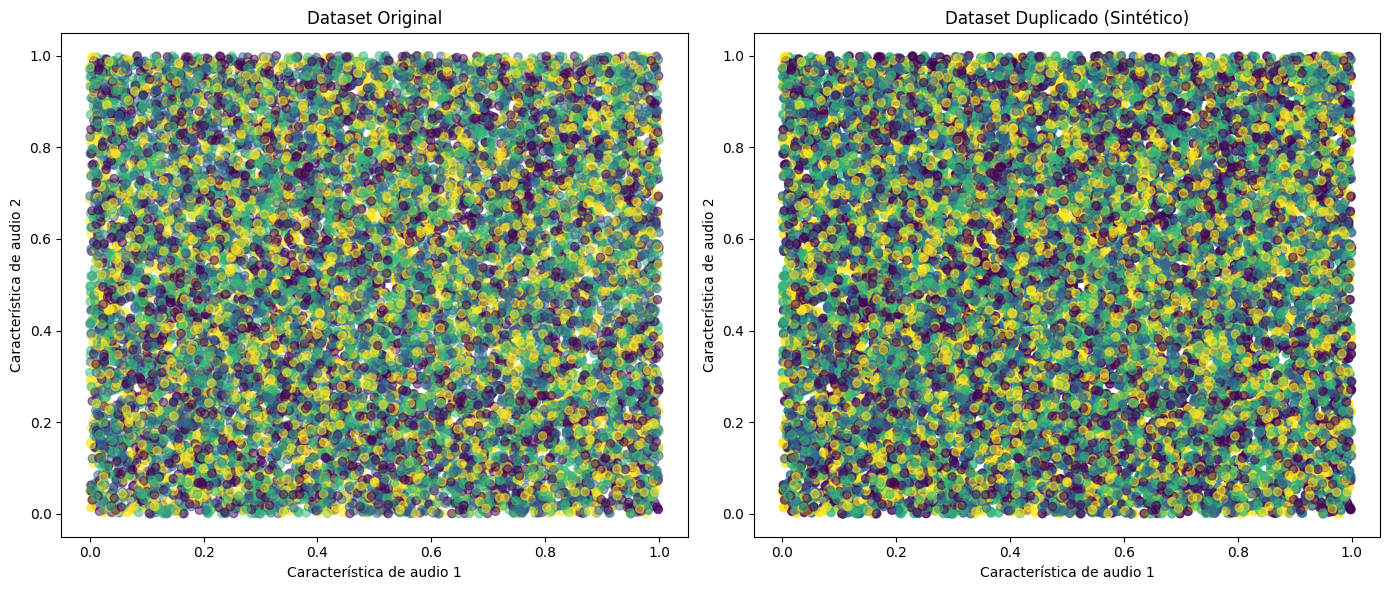

In [49]:
# Paso 3: Crear gráficas representativas de los datos
# Graficamos la relación entre  en el dataset original y sintético.
"""
plt.figure(figsize=(12, 5))
"""

# Gráfica del dataset original
plt.figure(figsize=(14, 6))

# Dataset original
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=habitat_numeric, cmap='viridis', alpha=0.5)
plt.title('Dataset Original')
plt.xlabel('Característica de audio 1')
plt.ylabel('Característica de audio 2')

# Dataset duplicado (sintético)
plt.subplot(1, 2, 2)
plt.scatter(X_final[:, 0], X_final[:, 1], c=X_final[:, 171], cmap='viridis', alpha=0.5)
plt.title('Dataset Duplicado (Sintético)')
plt.xlabel('Característica de audio 1')
plt.ylabel('Característica de audio 2')

# Mostrar gráficas
plt.tight_layout()
plt.show()


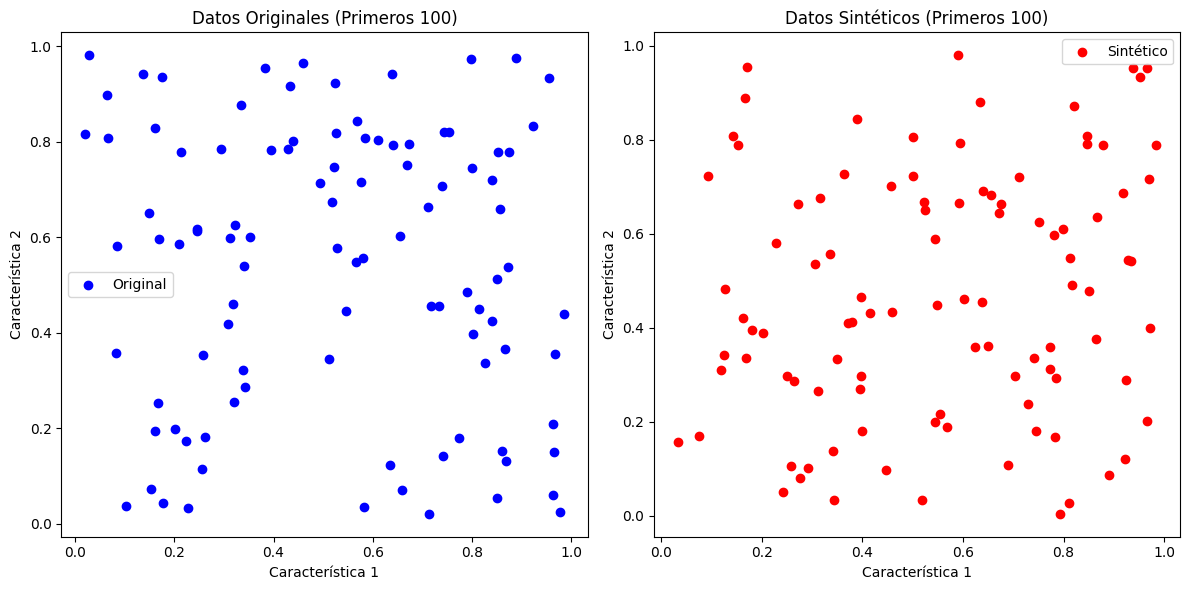

In [50]:
# Tomar solo los primeros 100 valores de cada uno
X_inicial_100 = X[:100]
X_sintetico_100 = X_final[2000:2100]

# Crear las gráficas
plt.figure(figsize=(12, 6))

# Gráfica de los datos originales
plt.subplot(1, 2, 1)  # Subplot 1 de 2
plt.scatter(X_inicial_100[:, 0], X_inicial_100[:, 1], color='blue', label='Original')
plt.title('Datos Originales (Primeros 100)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Gráfica de los datos sintéticos
plt.subplot(1, 2, 2)  # Subplot 2 de 2
plt.scatter(X_sintetico_100[:, 0], X_sintetico_100[:, 1], color='red', label='Sintético')
plt.title('Datos Sintéticos (Primeros 100)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()

# Dividir el dataset en datos de entrenamiento y prueba

In [51]:
# Paso 4: Dividir el dataset en datos de entrenamiento y prueba
# Vamos a usar el 80% de los datos para entrenamiento y el 20% para prueba.

def dividir_datos(dataset, porcentaje_entrenamiento=0.8):
    np.random.shuffle(dataset)  # Mezclar los datos
    """
    # X son todas las columnas excepto la 172 (índice 171), y es la columna 172 (índice 171)
    X = dataset[:, :-1]  # Todas las columnas menos la última (172)
    y = dataset[:, -1]   # Columna 172 (índice 171)
    """
    # Selecciona todas las columnas menos la columna 172
    X = np.delete(dataset, 172, axis=1)

    # Selecciona solo la columna 172 como y
    y = dataset[:, 172]
    # Calcular el número de muestras de entrenamiento
    num_entrenamiento = int(len(dataset) * porcentaje_entrenamiento)

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test = X[:num_entrenamiento], X[num_entrenamiento:]
    y_train, y_test = y[:num_entrenamiento], y[num_entrenamiento:]

    return X_train, X_test, y_train, y_test

In [52]:
dataset_sintetico = X_final
# Dividir el dataset sintético
X_train, X_test, y_train, y_test = dividir_datos(dataset_sintetico)

# Imprimir los resultados
print("\nNúmero de ejemplos en entrenamiento:", len(X_train))
print("Número de ejemplos en prueba:", len(X_test))

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Número de ejemplos en entrenamiento: 26601
Número de ejemplos en prueba: 6651
X_train shape: (26601, 174)
X_test shape: (6651, 174)
y_train shape: (26601,)
y_test shape: (6651,)


# Normalización

In [53]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [54]:
# llama featureNormalize con los datos cargados
X_train_norm, mu, sigma = featureNormalize(X_train)

In [55]:
def normalizeUsingParams(X, mu, sigma):
    return (X - mu) / sigma

# Normalizar X_test usando los parámetros obtenidos de X_train
X_test_norm = normalizeUsingParams(X_test, mu, sigma)


In [56]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
#m, n = X.shape
# Agraga el termino de intercepción a A
# X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
#X = X_norm
# X = np.concatenate([np.ones((m, 1)), X], axis=1)
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)


Dimensiones de X: (16626, 175)
Dimensiones de y: (16626,)
Dimensiones de X_train: (26601, 174)
Dimensiones de y_train: (26601,)


# Entrenar un modelo de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

In [57]:
# Paso 5: Definir la regresión logística para clasificación binaria (Ejemplo: si el auto es nuevo o no)

# Función de Sigmoide
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Evitar overflow en los valores extremos
    return 1 / (1 + np.exp(-z))


# Función de costo para la regresión logística
def costo_logistico(theta, X, y, lambda_=0.3):
    m = len(y)
    h = sigmoid(X @ theta)

    # Regularización (excluyendo el término theta[0])
    reg = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)

    # Función de costo
    costo = (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h)) + reg
    return costo


# Función de gradiente
def gradiente_logistico_2(theta, X, y, alpha, num_iters, lambda_=0):
    m = len(y)
    costo_historial = []

    for _ in range(num_iters):
        h = sigmoid(X @ theta)
        error = h - y
        grad = (1/m) * X.T @ error

        # Aplicar regularización
        theta[0] = theta[0] - alpha * grad[0]  # No se regulariza el término de bias
        theta[1:] = theta[1:] - alpha * (grad[1:] + (lambda_ / m) * theta[1:])

        # Guardar el historial del costo para graficar más tarde
        costo_historial.append(costo_logistico(theta, X, y, lambda_))
        print("Dimensiones de X_train:", X_train.shape)
        print("Dimensiones de y_train:", y_train.shape)
        print("Dimensiones de theta:", theta.shape)

    return theta, costo_historial
"""
def gradiente_logistico(theta, X, y, alpha, num_iters, lambda_=0):
    m = len(y)  # Número de ejemplos

    for _ in range(num_iters):
        h = sigmoid(X @ theta)  # Calcular hipótesis
        error = h - y  # Calcular el error
        grad = (1/m) * X.T @ error  # Calcular el gradiente

        # Aplicar regularización si se usa lambda_
        if lambda_ > 0:
            grad[1:] += (lambda_ / m) * theta[1:]

        theta -= alpha * grad  # Actualizar los parámetros

    return theta
    """
def gradiente_logistico(theta, X, y, alpha, num_iters, lambda_=0.3):
    m = X.shape[0]
    n = X.shape[1]
    for _ in range(num_iters):
        h = sigmoid(X @ theta)  # Calcular hipótesis
        error = h - y  # Calcular el error
        grad = (1/m) * X.T @ error  # Calcular el gradiente

        # Aplicar regularización si se usa lambda_
        if lambda_ > 0:
            grad[1:] += (lambda_ / m) * theta[1:]

        theta -= alpha * grad

    return theta



In [58]:
# Entrenar un modelo para cada clase usando One-vs-Rest
"""
def entrenar_OvR(X, y, num_clases, alpha, num_iters):
    n = X.shape[1]  # Número de características
    theta_all = np.zeros((num_clases, n))  # Matriz para almacenar los parámetros de cada clase

    for clase in range(1, num_clases + 1):
        # Crear etiquetas binarias para la clase actual (OvR)
        y_binaria = np.where(y == clase, 1, 0)

        # Inicializar los parámetros (pesos)
        # theta = np.zeros(n)
        theta = np.zeros((n, 1))

        # Entrenar el modelo de regresión logística con gradiente descendente
        theta_all[clase - 1] = gradiente_logistico(X, y_binaria, theta, alpha, num_iters)
        print("Dimensiones de X_train:", X_train.shape)
        print("Dimensiones de y_train:", y_train.shape)
        print("Dimensiones de theta:", theta.shape)
    return theta_all
"""
def entrenar_OvR(X, y, num_clases, alpha, num_iters):
    m, n = X.shape
    theta_all = []
    for i in range(num_clases):
        y_i = (y == i).astype(int)
        theta = np.zeros(n)
        theta = gradiente_logistico(theta, X, y_i, alpha, num_iters)
        theta_all.append(theta)
    return theta_all


In [59]:
# Predecir las clases usando los modelos entrenados (OvR)
def predecir_OvR(X, theta_all):
    theta_all = np.array(theta_all)  # Convertir theta_all a un array de NumPy
    predicciones = sigmoid(X @ theta_all.T)  # Obtener probabilidades para cada clase
    return np.argmax(predicciones, axis=1) + 1  # Devolver la clase con la mayor probabilidad


In [60]:
# Agregar una columna de unos (intercepto) a X_train_norm
X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
"""
# Normalizar X_test usando los parámetros obtenidos de X_train
X_test_norm = normalizeUsingParams(X_test, mu, sigma)
"""
# Agregar una columna de unos (intercepto) a X_test_norm
X_test_norm = np.c_[np.ones(X_test_norm.shape[0]), X_test_norm]

# Parámetros de entrenamiento
alpha = 1  # Tasa de aprendizaje
num_iters = 25  # Iteraciones del gradiente descendente
num_clases = 84  # Número de clases (especies)

# Entrenar los modelos OvR
theta_all = entrenar_OvR(X_train_norm, y_train, num_clases, alpha, num_iters)

# Predecir en el conjunto de prueba
y_pred = predecir_OvR(X_test_norm, theta_all)

# Calcular precisión
precision = np.mean(y_pred == y_test) * 100
print(f"Precisión en el conjunto de prueba: {precision:.2f}%")

Precisión en el conjunto de prueba: 23.21%


In [61]:
def lrCostFunction(theta, X, y, lambda_):

    m = y.size  # número de ejemplos

    # Si las etiquetas son booleanas, convertirlas a enteros
    if y.dtype == bool:
        y = y.astype(int)

    # Inicializar el costo y el gradiente
    J = 0
    grad = np.zeros(theta.shape)

    # Hipótesis de la regresión logística
    h = sigmoid(X.dot(theta.T))

    # Excluir el parámetro theta[0] para regularización (no regularizamos el término de intercepción)
    temp = theta.copy()
    temp[0] = 0

    # Función de costo regularizada
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # Gradiente regularizado
    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad


In [62]:
import matplotlib.pyplot as plt

def oneVsAll(X, y, num_labels, lambda_, max_iter=100):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))

    # Agregar un término de sesgo a X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Lista para guardar los historiales de costo por clase
    cost_histories = []

    for i in range(1, num_labels + 1):
        # Crear etiquetas binarias para la clase i
        y_i = np.where(y == i, 1, 0)

        # Inicializar theta para la clase i
        initial_theta = np.zeros(n + 1)

        # Usar optimización o tu algoritmo de gradiente
        # Puedes usar scipy.optimize.minimize o tu propio gradiente descendente

        # Lista para el historial de costos en cada iteración
        cost_history = []

        for iter in range(max_iter):
            cost, grad = lrCostFunction(initial_theta, X, y_i, lambda_)
            cost_history.append(cost)  # Almacenar el costo
            initial_theta -= 0.01 * grad  # Ejemplo de actualización de theta

        # Guardar el theta entrenado para esta clase
        all_theta[i - 1, :] = initial_theta

        # Guardar el historial de costos para esta clase
        cost_histories.append(cost_history)

    return all_theta, cost_histories

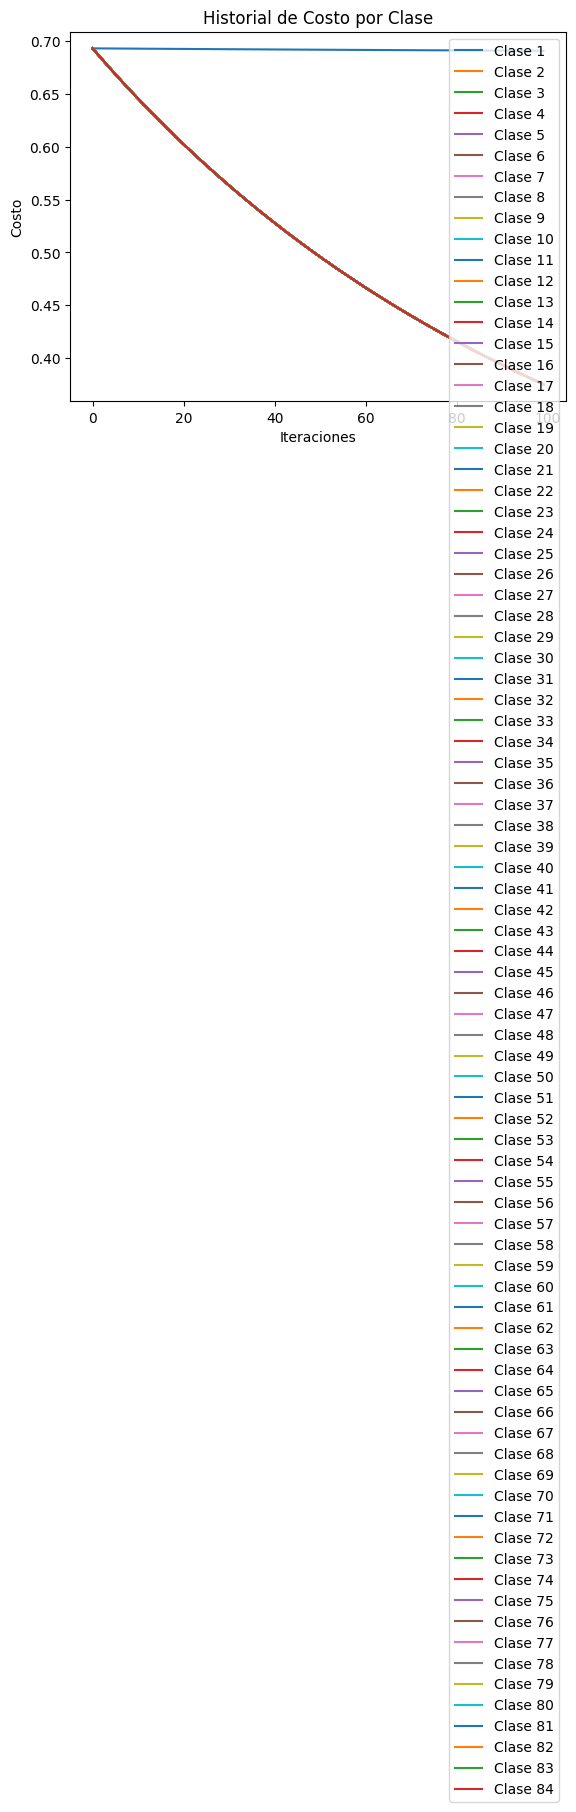

In [63]:
num_labels = 84  # Número de clases
lambda_ = 1.0  # Parámetro de regularización

# Entrenar el modelo usando One-vs-All
all_theta, cost_histories = oneVsAll(X_train_norm, y_train, num_labels, lambda_)

# Graficar los costos por clase
for i, cost_history in enumerate(cost_histories):
    plt.plot(cost_history, label=f'Clase {i + 1}')  # Clase i + 1 porque las clases van de 1 a num_labels

plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Historial de Costo por Clase')
plt.legend()
plt.show()

In [64]:
# Paso 6: Entrenar el modelo de regresión logística binaria
# Convertir datos a formato numérico: Precio, Año (sin variables de texto)

def preprocesar_datos(dataset):
    X = np.array([[float(e[0]), int(e[1])] for e in dataset])  # Solo precios y años
    y = np.array([1 if e[3] == 'True' else 0 for e in dataset])  # Etiqueta binaria: si es nuevo o no
    return X, y

#X_train, y_train = preprocesar_datos(num_entrenamiento)
#X_test, y_test = preprocesar_datos(datos_prueba)

In [65]:
# Añadir una columna de unos a X_train para el término de sesgo (intercepto)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [66]:
# Inicializar parámetros (pesos)
theta = np.zeros(X_train.shape[1])

In [67]:
def entrenar_one_vs_all(X, y, num_labels, alpha=0.01, num_iters=1000, lambda_=0):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))  # n + 1 para incluir el bias

    # Añadimos una columna de unos a X (bias term)
    X_b = np.c_[np.ones((m, 1)), X]

    for i in range(1, num_labels + 1):  # Entrenamos para cada clase
        print(f"Entrenando la clase {i}/{num_labels}")

        # Convertir el problema en "clase i vs el resto"
        y_clase_i = np.where(y == i, 1, 0)

        # Inicializar theta para la clase i
        theta = np.zeros(n + 1)
        print(f"Dimensiones de X: {X.shape}")
        print(f"Dimensiones de y: {y.shape}")
        print(f"Dimensiones de theta: {theta.shape}")

        # Entrenar el modelo de regresión logística para la clase i
        theta, _ = gradiente_logistico_2(theta, X_b, y_clase_i, alpha, num_iters, lambda_)
        all_theta[i - 1] = theta

    return all_theta


In [72]:
def predecir_one_vs_all(all_theta, X):
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]  # Añadimos la columna de unos (bias term)

    # Predecimos las probabilidades para cada clase
    probabilidades = sigmoid(X_b @ all_theta.T)

    # Seleccionamos la clase con la probabilidad más alta
    return np.argmax(probabilidades, axis=1) + 1  # +1 porque las etiquetas empiezan en 1


In [69]:
alpha = 0.1  # Tasa de aprendizaje
num_iters = 300  # Número de iteraciones
lambda_ = 1  # Parámetro de regularización

# Entrenamos el modelo One-vs-All
all_theta = entrenar_one_vs_all(X, y, num_labels, alpha, num_iters, lambda_)


Se han truncado las últimas 5000 líneas del flujo de salida.
Dimensiones de X_train: (26601, 175)
Dimensiones de y_train: (26601,)
Dimensiones de theta: (176,)
Dimensiones de X_train: (26601, 175)
Dimensiones de y_train: (26601,)
Dimensiones de theta: (176,)
Dimensiones de X_train: (26601, 175)
Dimensiones de y_train: (26601,)
Dimensiones de theta: (176,)
Dimensiones de X_train: (26601, 175)
Dimensiones de y_train: (26601,)
Dimensiones de theta: (176,)
Dimensiones de X_train: (26601, 175)
Dimensiones de y_train: (26601,)
Dimensiones de theta: (176,)
Dimensiones de X_train: (26601, 175)
Dimensiones de y_train: (26601,)
Dimensiones de theta: (176,)
Dimensiones de X_train: (26601, 175)
Dimensiones de y_train: (26601,)
Dimensiones de theta: (176,)
Dimensiones de X_train: (26601, 175)
Dimensiones de y_train: (26601,)
Dimensiones de theta: (176,)
Dimensiones de X_train: (26601, 175)
Dimensiones de y_train: (26601,)
Dimensiones de theta: (176,)
Dimensiones de X_train: (26601, 175)
Dimensiones

In [73]:
# Predecimos en el conjunto de entrenamiento
y_pred = predecir_one_vs_all(all_theta, X)

# Calculamos la precisión
precision = np.mean(y_pred == y) * 100
print(f'Precisión del modelo en el conjunto de entrenamiento: {precision:.2f}%')


Precisión del modelo en el conjunto de entrenamiento: 10.29%


In [78]:
# Paso 7: Evaluar el modelo con los datos de prueba
def predecir(X, theta):
    return sigmoid(X @ theta) >= 0.5

# Predicciones y precisión del modelo
predicciones = predecir(X_test, theta)
precision = np.mean(predicciones == y_test) * 100

print(f'Precisión del modelo en el conjunto de prueba: {precision:.2f}%')


Precisión del modelo en el conjunto de prueba: 49.66%


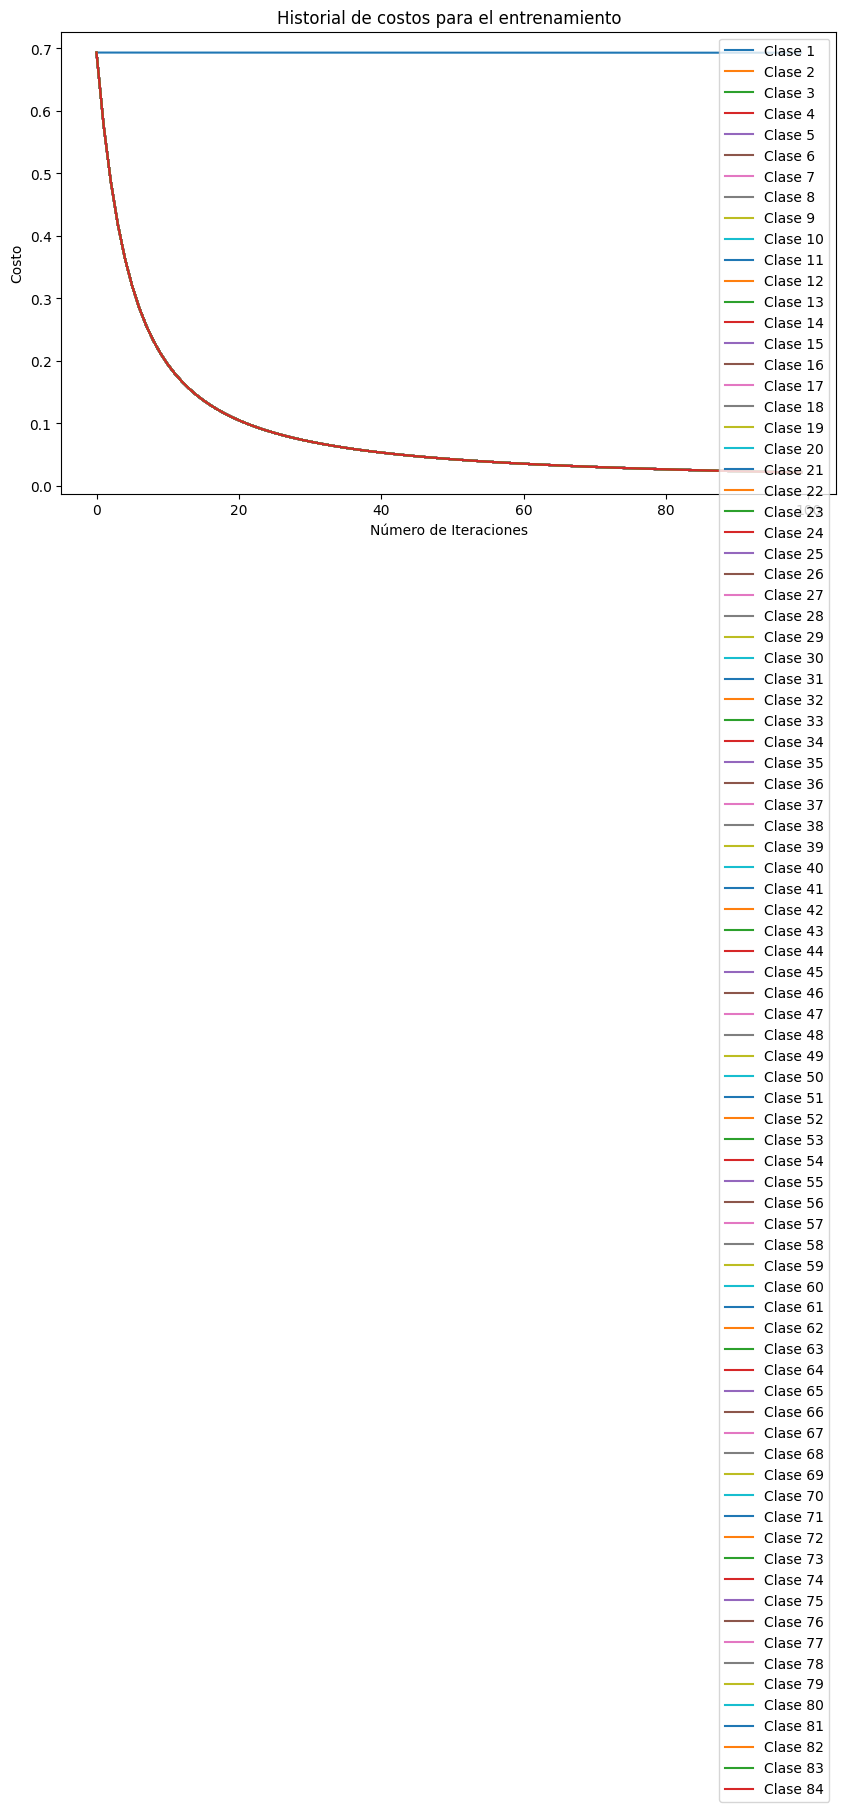

Precisión del modelo en el conjunto de prueba: 49.66%


In [84]:
lambda_ = 0.1
num_labels = 84
# Llamar a la función oneVsAll
all_theta, cost_histories = oneVsAll(X_train, y_train, num_labels, lambda_, max_iter=100)

# Graficar el historial de costos para cada clase
plt.figure(figsize=(10, 6))
for c in range(num_labels):
    plt.plot(range(len(cost_histories[c])), cost_histories[c], label=f'Clase {c + 1}')

plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo')
plt.title('Historial de costos para el entrenamiento')
plt.legend()
plt.show()
# Predicciones y precisión del modelo
predicciones = predecir_one_vs_all(all_theta, X_test) # Use the correct prediction function for multi-class classification
precision = np.mean(predicciones == y_test) * 100

print(f'Precisión del modelo en el conjunto de prueba: {precision:.2f}%')